In [2]:
from google.colab import files
import pandas as pd


uploaded = files.upload()



Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


In [4]:
import pandas as pd

df = pd.read_csv('SuperMarket Analysis.csv')

In [5]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [6]:
# 1.first few rows to confirm data structure
print("--- Head of DataFrame ---")
print(df.head())

# 2.To Check column names, data types, and count of non-null values
print("\n--- DataFrame Info ---")
df.info()

# 3. To Get a statistical summary for numeric columns
print("\n--- Statistical Summary ---")
print(df.describe())

--- Head of DataFrame ---
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date         Time      Payment    cogs  gross margin percentage  \
0  01-05-2019   1:08:00 PM      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29:00 AM         Cash   76.40     

In [7]:
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
except ValueError:

    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')



print(df['Date'].dtype)

datetime64[ns]


In [8]:
#  Data Cleaning & Preprocessing

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop or fill missing data
df = df.dropna()


for col in ['City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    df[col] = df[col].str.strip().str.title()


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers detected")

Missing values per column:
Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Sales                        0
Date                       413
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
dtype: int64
Unit price: 0 outliers detected
Quantity: 0 outliers detected
Tax 5%: 4 outliers detected
Sales: 4 outliers detected
cogs: 4 outliers detected
gross margin percentage: 0 outliers detected
gross income: 4 outliers detected
Rating: 0 outliers detected


--- Quantity Sold Ranking (High Demand) ---
 Product line
Electronic Accessories    622
Sports And Travel         549
Food And Beverages        525
Fashion Accessories       513
Health And Beauty         508
Home And Lifestyle        448
Name: Quantity, dtype: int64


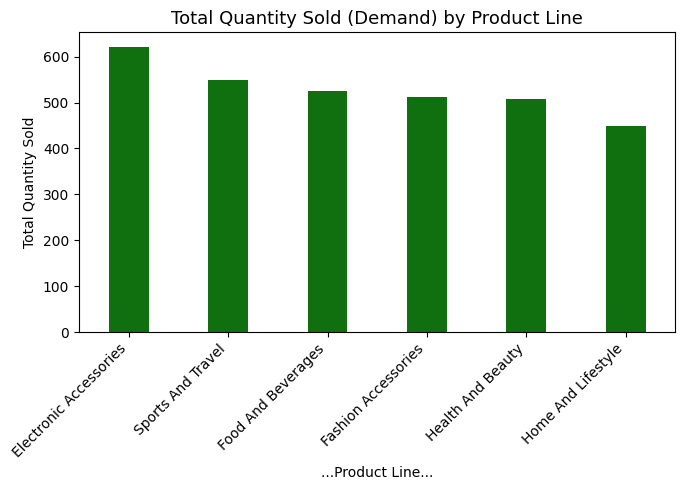

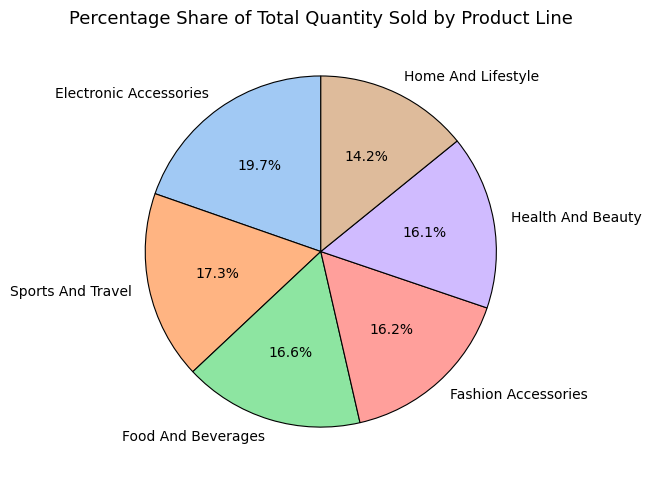

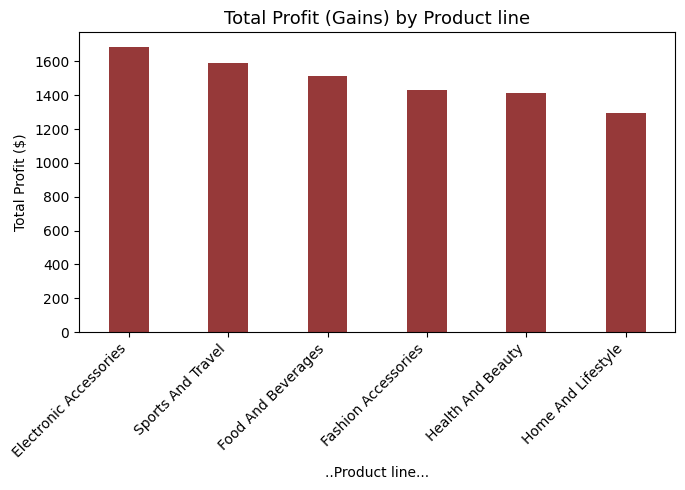

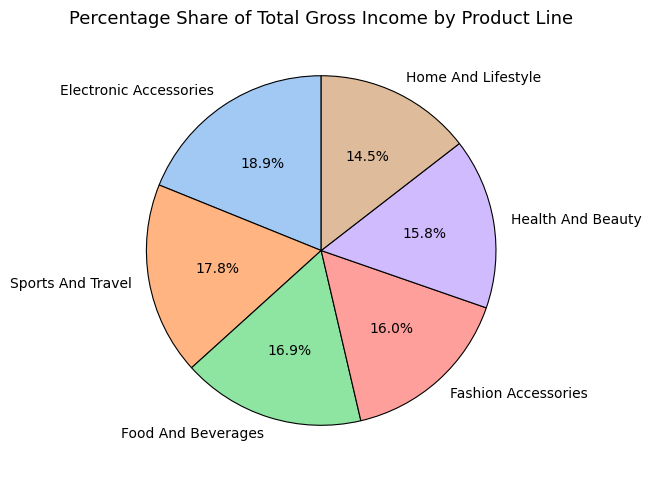

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# A. Total Quantity Sold (Demand)
product_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print("--- Quantity Sold Ranking (High Demand) ---\n", product_quantity)

# Visualization of Quantity Sold
plt.figure(figsize=(7,5))
sns.barplot(x=product_quantity.index, y=product_quantity.values, color='green',width=0.4)

plt.title('Total Quantity Sold (Demand) by Product Line',fontsize=13)
plt.xlabel('...Product Line...')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6.5, 6.5))

plt.pie(
    product_quantity.values,
    labels=product_quantity.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8},colors=sns.color_palette('pastel')
)

plt.title('Percentage Share of Total Quantity Sold by Product Line',
    fontsize=13)
plt.ylabel('')
plt.tight_layout()
plt.show()


product_profit = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)



# Visualization of Profit
plt.figure(figsize=(7,5))
sns.barplot(x=product_profit.index, y=product_profit.values, color='brown',width=0.4)
plt.title('Total Profit (Gains) by Product line',
    fontsize=13)
plt.xlabel('..Product line...')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6.5, 6.5))


plt.pie(
    product_profit.values,
    labels=product_profit.index,
    autopct='%1.1f%%',

    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8},colors=sns.color_palette('pastel')
)



plt.title('Percentage Share of Total Gross Income by Product Line',
    fontsize=13)
plt.ylabel('')
plt.tight_layout()
plt.show()

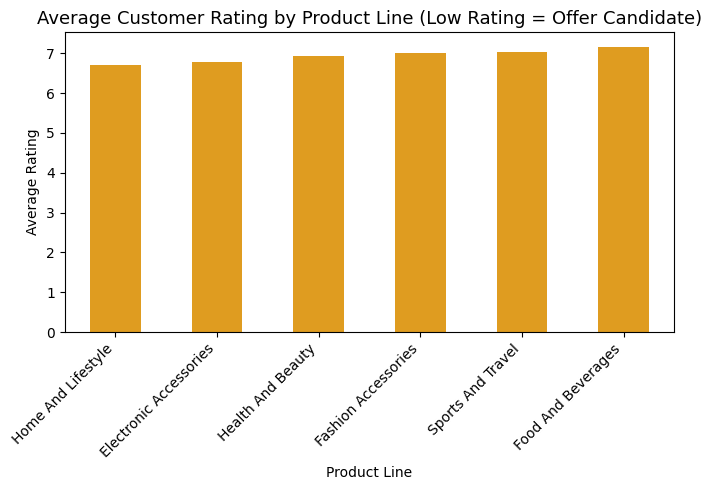

In [10]:
# A. Average Rating by Product Line (Lowest ratings are candidates for offers/discounts)
avg_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=True)

plt.figure(figsize=(7,5))
sns.barplot(x=avg_rating.index, y=avg_rating.values, color='orange',width=0.5)
plt.title('Average Customer Rating by Product Line (Low Rating = Offer Candidate)',fontsize=13)
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

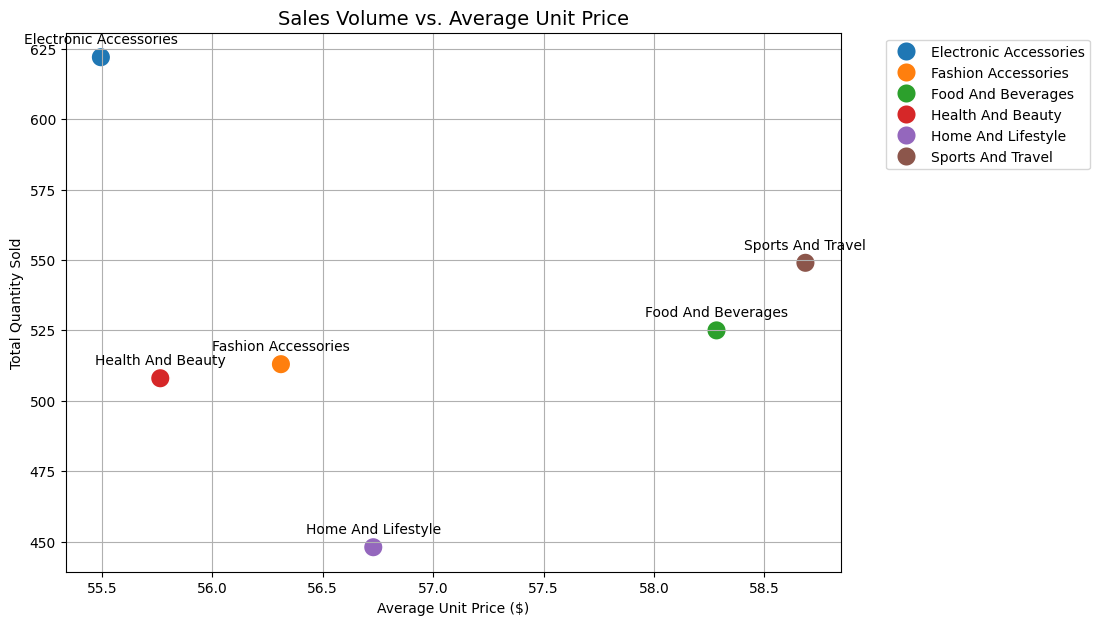

In [11]:
# A. Sales Volume vs. Average Unit Price
price_vs_sales = df.groupby('Product line').agg(
    Avg_Price=('Unit price', 'mean'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

plt.figure(figsize=(10,7))
sns.scatterplot(data=price_vs_sales, x='Avg_Price', y='Total_Quantity', s=200, hue='Product line', palette='tab10', legend='full')


for i in range(len(price_vs_sales)):
    plt.annotate(price_vs_sales['Product line'][i],
                 (price_vs_sales['Avg_Price'][i], price_vs_sales['Total_Quantity'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Sales Volume vs. Average Unit Price',fontsize=14)
plt.xlabel('Average Unit Price ($)')
plt.ylabel('Total Quantity Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [12]:
product_metrics = df.groupby('Product line').agg(
    Avg_Rating = ('Rating', 'mean'),

    Avg_Price = ('Unit price', 'mean'),
    Avg_Profit_Per_Item = ('gross income', 'mean')
).reset_index()


# Sales = Total (Column K in your spreadsheet)
# Gross Income = gross income (Column O)
# COGS = Sales - Gross Income
product_metrics['Avg_COGS'] = product_metrics['Avg_Price'] - product_metrics['Avg_Profit_Per_Item']

--- Average Sales by Day of the Week ---
     DayName        Sales
0     Monday  3032.499000
1    Tuesday  3643.540500
2  Wednesday  3640.696500
3   Thursday  3449.300167
4     Friday  3842.677500
5   Saturday  3707.452500
6     Sunday  3459.762000


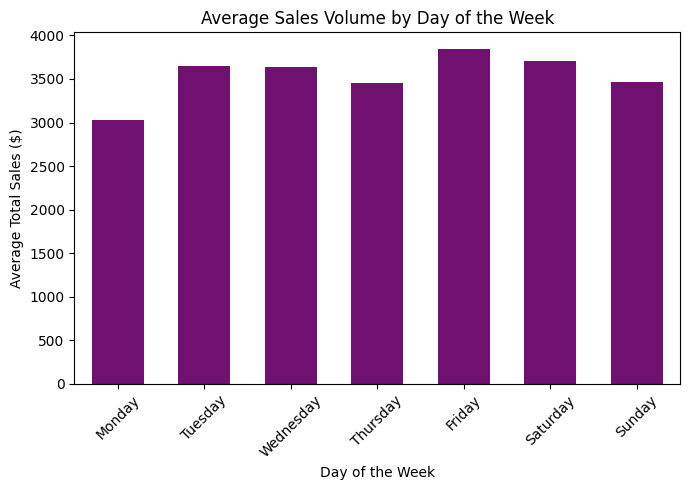

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Date'] = pd.to_datetime(df['Date'])

# 1. Aggregate Sales by Day
daily_sales = df.groupby(df['Date'].dt.date)['Sales'].sum().reset_index()
daily_sales['Date'] = pd.to_datetime(daily_sales['Date']) # Convert back to datetime for plotting

# 2. Extract Day of the Week
# '0' = Monday, '6' = Sunday
daily_sales['DayOfWeek'] = daily_sales['Date'].dt.dayofweek
daily_sales['DayName'] = daily_sales['Date'].dt.day_name()

# 3. Analyze Average Sales by Day of the Week
# This identifies which days are historically the weakest (best for offers)
average_daily_sales = daily_sales.groupby('DayName')['Sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

print("--- Average Sales by Day of the Week ---")
print(average_daily_sales)

# 4. Visualization: Average Sales by Day of the Week (Bar Chart)
plt.figure(figsize=(7,5))
sns.barplot(x='DayName', y='Sales', data=average_daily_sales, color='purple',width=0.6)
plt.title('Average Sales Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

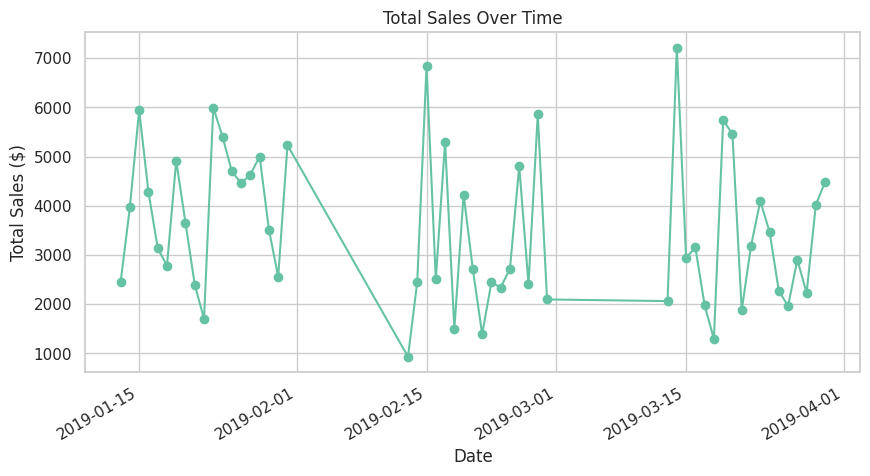

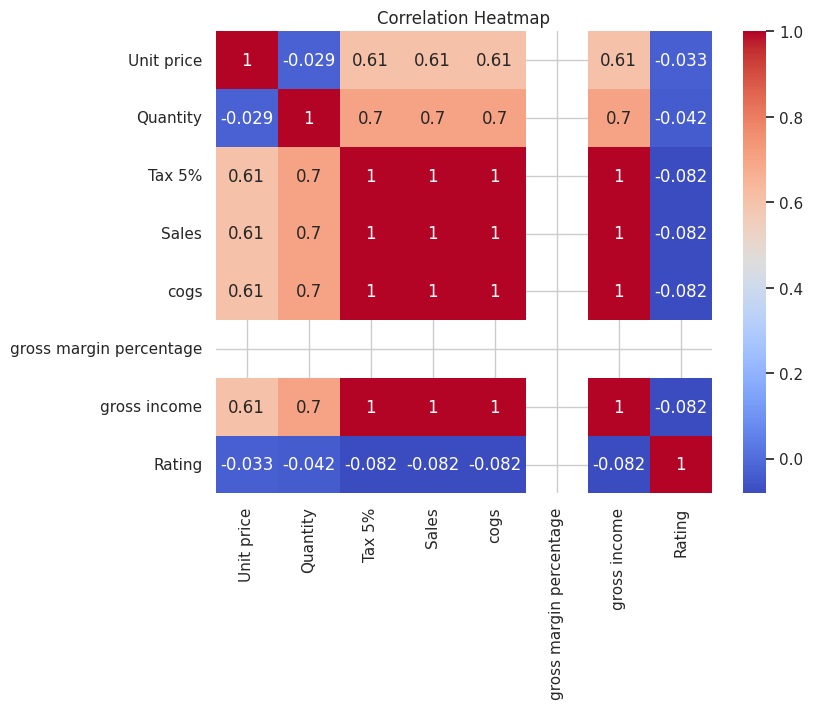

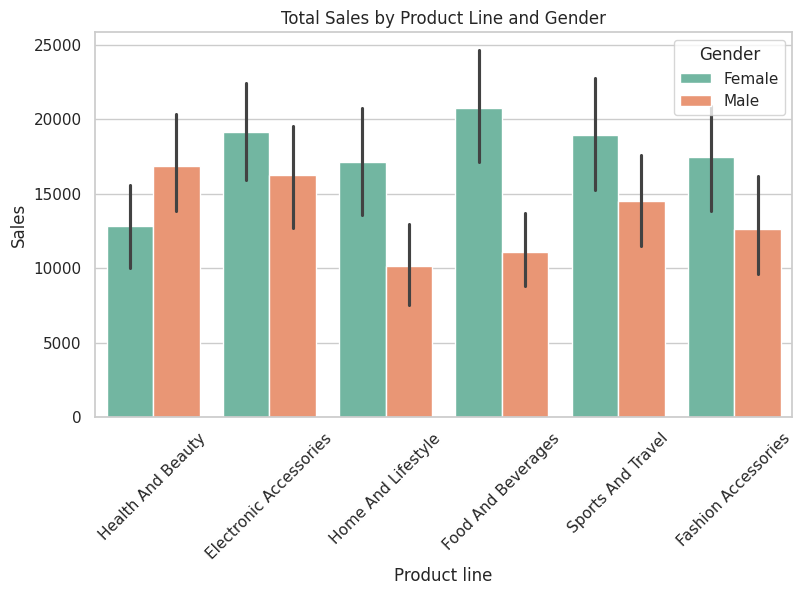

/tmp/ipython-input-1904832421.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Branch', y='Sales', data=df, estimator='sum', ci=None,width=0.4)


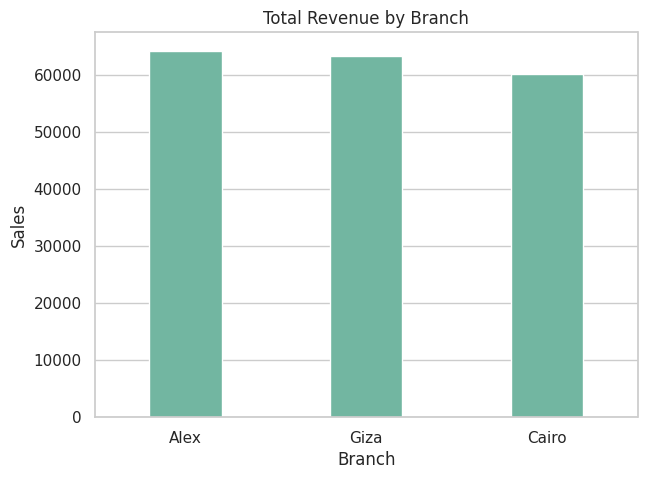

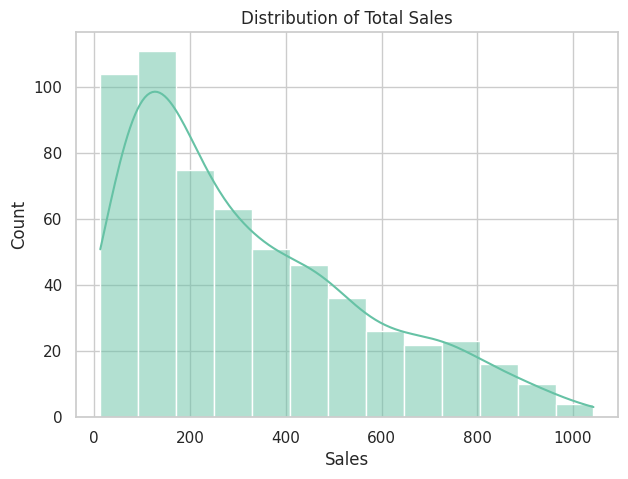

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='Set2')

#Sales over time
plt.figure(figsize=(10,5))
df.groupby('Date')['Sales'].sum().plot(kind='line', marker='o')
plt.title("Total Sales Over Time")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Gender vs Product Line Sales
plt.figure(figsize=(9,5))
sns.barplot(x='Product line', y='Sales', hue='Gender', data=df, estimator='sum')
plt.title("Total Sales by Product Line and Gender")
plt.xticks(rotation=45)
plt.show()

# Branch vs Revenue
plt.figure(figsize=(7,5))
sns.barplot(x='Branch', y='Sales', data=df, estimator='sum', ci=None,width=0.4)
plt.title("Total Revenue by Branch")
plt.show()

# Distribution of Total Sales
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Total Sales")
plt.show()

In [15]:
total_sales = df['Sales'].sum()
avg_bill = df['Sales'].mean()
gross_income = df['gross income'].sum() if 'gross income' in df.columns else None

print(f" Total Revenue: ${total_sales:,.2f}")
print(f" Average Bill: ${avg_bill:,.2f}")
if gross_income:
    print(f" Total Gross Income: ${gross_income:,.2f}")


if 'gross income' in df.columns:
    profit_by_product = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
    print("\nMost Profitable Product Lines:")
    print(profit_by_product)

# Payment preferences
payment_pref = df['Payment'].value_counts()
print("\nPayment Method Preferences:\n", payment_pref)

 Total Revenue: $187,611.49
 Average Bill: $319.61
 Total Gross Income: $8,933.88

Most Profitable Product Lines:
Product line
Electronic Accessories    1687.0415
Sports And Travel         1591.9005
Food And Beverages        1513.7420
Fashion Accessories       1432.5780
Health And Beauty         1411.9890
Home And Lifestyle        1296.6295
Name: gross income, dtype: float64

Payment Method Preferences:
 Payment
Cash           208
Ewallet        202
Credit Card    177
Name: count, dtype: int64


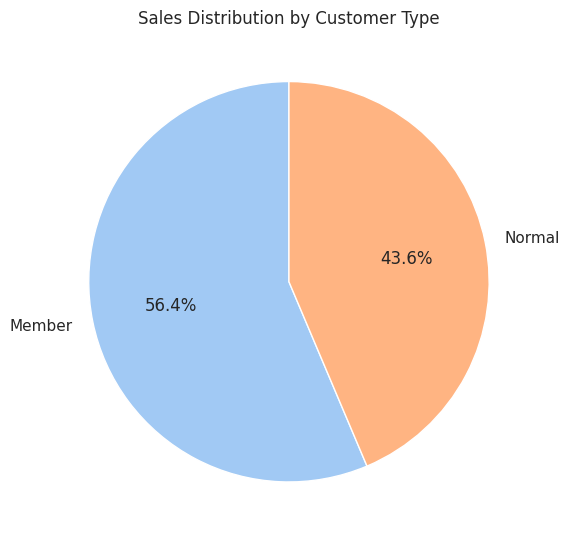

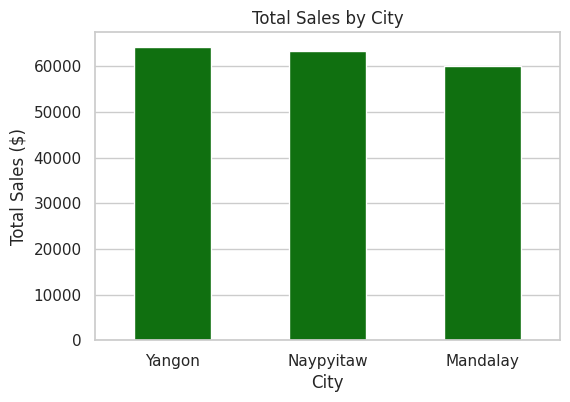

In [17]:
# A. Sales Distribution by Customer Type (Member vs. Normal)
customer_sales = df.groupby('Customer type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6.5,6.5))
plt.pie(customer_sales, labels=customer_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Customer Type')
plt.show()

# B. Product Preference by City (Regional Stocking)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=city_sales.index, y=city_sales.values, color='green',width=0.5)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.show()